# Sarcasm Detection in News Headlines
https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_json('/content/gdrive/MyDrive/LSMA/Project/Sarcasm_Headlines_Dataset_v2.json', lines = True)
df.head()

is_sarcastic  ...                                       article_link
0             1  ...  https://www.theonion.com/thirtysomething-scien...
1             0  ...  https://www.huffingtonpost.com/entry/donna-edw...
2             0  ...  https://www.huffingtonpost.com/entry/eat-your-...
3             1  ...  https://local.theonion.com/inclement-weather-p...
4             1  ...  https://www.theonion.com/mother-comes-pretty-c...

[5 rows x 3 columns]

In [ ]:
len(df)

28619

The dataset contains 28619 news headlines.

# Data Wrangling

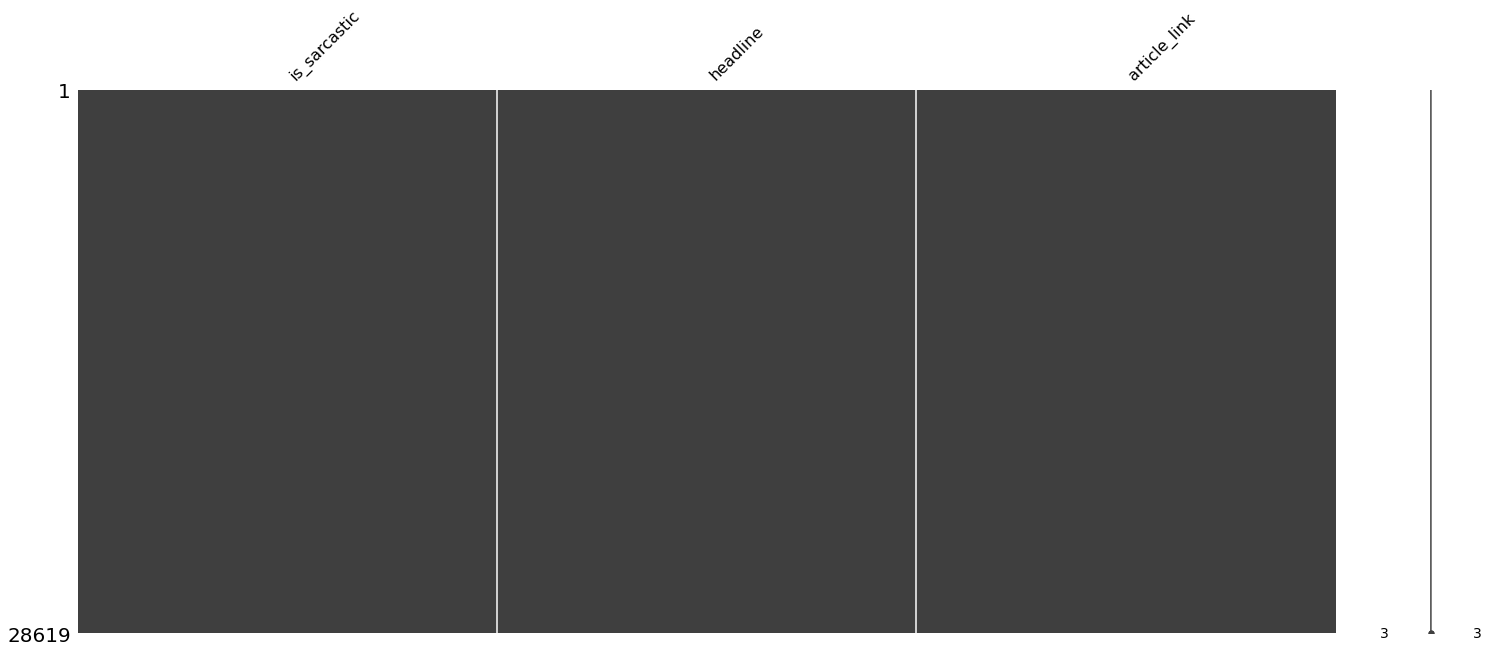

In [ ]:
import missingno as msno

msno.matrix(df)
plt.show()

There is no missing information.

# Exploratory Data Analysis before text cleaning

In [ ]:
df.shape

(28619, 3)

In [ ]:
df.article_link.apply(lambda x: x.split('/')[2]).value_counts()

www.huffingtonpost.com          14403
www.theonion.com                 6577
local.theonion.com               3351
politics.theonion.com            2222
entertainment.theonion.com       1337
www.huffingtonpost.comhttp:       503
sports.theonion.com               123
www.huffingtonpost.comhttps:       79
ogn.theonion.com                   24
Name: article_link, dtype: int64

In [ ]:
df.dtypes

is_sarcastic     int64
headline        object
article_link    object
dtype: object

The dataset contains 28619 news headlines and 3 features.
- is_sarcastic : 1 if the record is sarcastic otherwise 0
- headline : the headline of the news article
- article_link : link to the original news article. Useful in collecting supplementary
data


In [ ]:
df['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

13634 news headlines are sarcastic.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


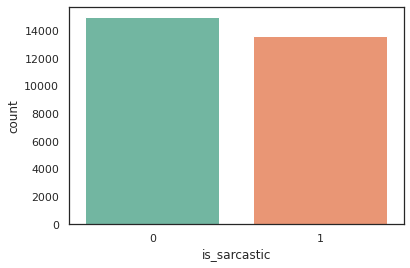

In [ ]:
import seaborn as sns
sns.set(palette = 'Set2', style = 'white')

sns.countplot(df.is_sarcastic, data=df);

In [ ]:
import re

df['source'] = df['article_link'].apply(lambda x: re.findall(r'\w+', x)[2])
df.head()

is_sarcastic  ...          source
0             1  ...        theonion
1             0  ...  huffingtonpost
2             0  ...  huffingtonpost
3             1  ...        theonion
4             1  ...        theonion

[5 rows x 4 columns]

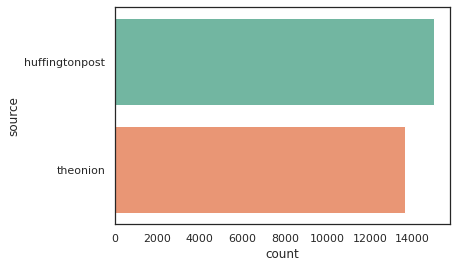

In [ ]:
sns.countplot(y = df.source, data=df, order = df['source'].value_counts().index)

The majority of the news headlines was collected from the Huffington Post.

In [ ]:
df['website'] = df.article_link.apply(lambda x: x.split('/')[2])
df = df.drop('article_link',axis =1)
df.head()

is_sarcastic  ...                 website
0             1  ...        www.theonion.com
1             0  ...  www.huffingtonpost.com
2             0  ...  www.huffingtonpost.com
3             1  ...      local.theonion.com
4             1  ...        www.theonion.com

[5 rows x 4 columns]

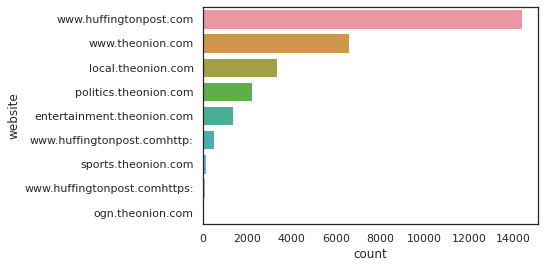

In [ ]:
sns.countplot(y = df.website, data=df, order = df['website'].value_counts().index)

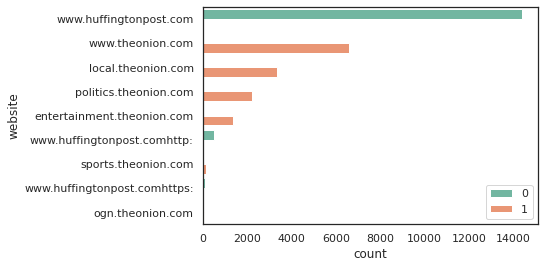

In [ ]:
sns.countplot(y = df.website, hue = "is_sarcastic", data = df, order = df['website'].value_counts().index)
plt.legend(loc = 'lower right')

We remove the feature 'website' which will not be important for our problem.

In [ ]:
del df['website']

## Length of news headlines

We evaluate the length of news headlines.

In [ ]:
df['length'] = df['headline'].apply(lambda x: len(x.split(" ")))
df.head()

is_sarcastic  ... length
0             1  ...      8
1             0  ...     13
2             0  ...      7
3             1  ...      8
4             1  ...      9

[5 rows x 4 columns]

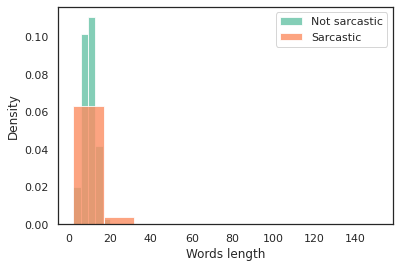

In [ ]:
import seaborn as sns

x = df.length[df.is_sarcastic == 0]
y = df.length[df.is_sarcastic == 1]

plt.hist(x, label = 'Not sarcastic', density = True, alpha = 0.8)
plt.hist(y, label = 'Sarcastic', density = True, alpha = 0.8)
plt.legend(loc = 'upper right')
plt.xlabel('Words length')
plt.ylabel('Density')
plt.show()

In [ ]:
df.length.describe()

count    28619.000000
mean        10.051854
std          3.390939
min          2.000000
25%          8.000000
50%         10.000000
75%         12.000000
max        151.000000
Name: length, dtype: float64

We check the minimum and the maximum headlines' words length.

In [ ]:
headline_min = df[(df.length == 2)]
headline_min

is_sarcastic               headline          source  length
269               0       trump's tailspin  huffingtonpost       2
489               0         sunday roundup  huffingtonpost       2
859               1            life unfair        theonion       2
1168              1              cher back        theonion       2
1225              0          clean machine  huffingtonpost       2
...             ...                    ...             ...     ...
27565             0  celebrating christmas  huffingtonpost       2
27935             0         sunday roundup  huffingtonpost       2
28094             1      chaps unnecessary        theonion       2
28376             0                bye bye  huffingtonpost       2
28571             0          refugee blues  huffingtonpost       2

[118 rows x 4 columns]

In [ ]:
headline_max = df[(df.length == 151)]
headline_max

is_sarcastic  ... length
7302             1  ...    151

[1 rows x 4 columns]

We can notice that there is a mistake because the news headline is length 151 which is quiete impossible. Thus, I decided to remove it.

In [ ]:
df = df.drop(labels = 7302, axis=0)

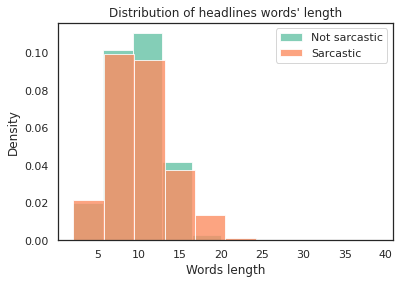

In [ ]:
import seaborn as sns

x = df.length[df.is_sarcastic == 0]
y = df.length[df.is_sarcastic == 1]

plt.hist(x, label = 'Not sarcastic', density = True, alpha = 0.8)
plt.hist(y, label = 'Sarcastic', density = True, alpha = 0.8)
plt.legend(loc = 'upper right')
plt.xlabel('Words length')
plt.ylabel('Density')
plt.title("Distribution of headlines words' length")
plt.show()

In [ ]:
df.length.describe()

count    28618.000000
mean        10.046929
std          3.287039
min          2.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         39.000000
Name: length, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


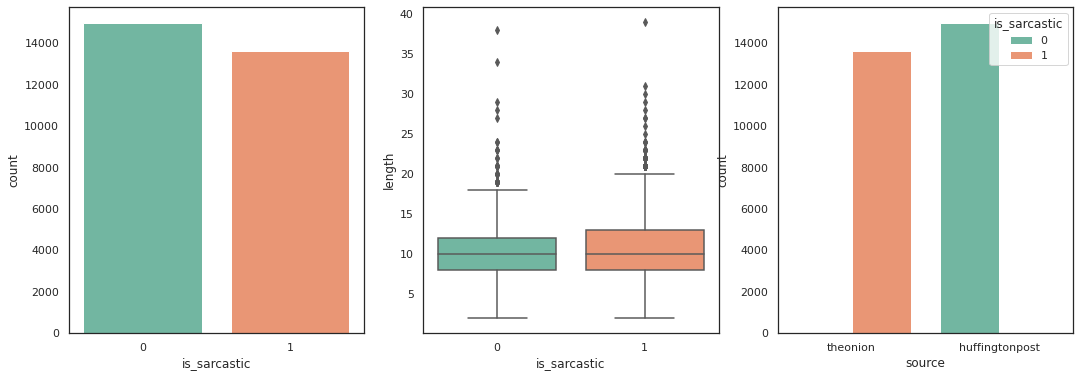

In [ ]:
plt.subplots(1,3, figsize= (18,6))
plt.subplot(131)
sns.countplot('is_sarcastic', data = df)
plt.subplot(132)
sns.boxplot(y = 'length', x = 'is_sarcastic', data = df)
plt.subplot(133)
sns.countplot('source', hue= 'is_sarcastic', data = df)

The last figure shows that sarcastic news headlines are from The Onion whereas non-sarcastic newd headlines are from the Huffington Post. This is consistent with the fact that The Onion aims at producing sarcastic versions of current events and the Huffington Post publish real non-sarcastic news headlines.

We remove the feature 'length' because it will not be used further.

In [ ]:
del df['length']

## Bigrams

In [ ]:
pairs = []
for item in df.headline:
  b = list(nltk.bigrams(item.split()))
  for tple in b:
    pairs.append(' '.join(tple))

The most commun bigrams in the news headlines.

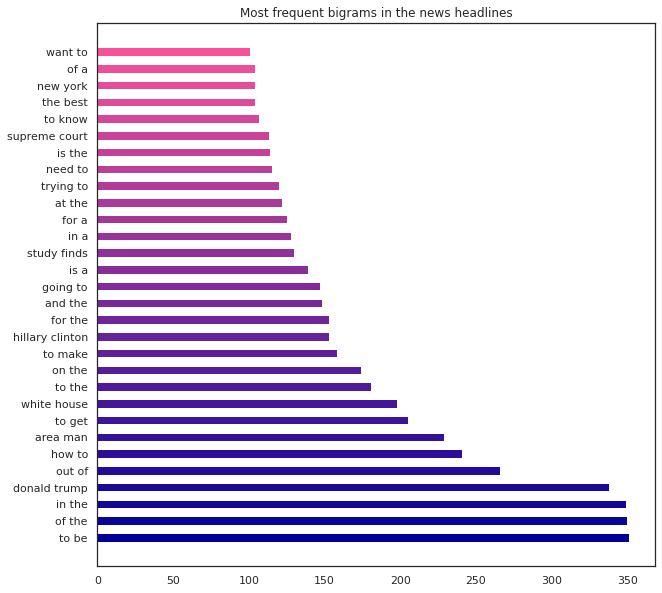

In [ ]:
from itertools import cycle, islice

pairs = pd.Series(pairs)
all_words = pairs.value_counts()

a = 30
x = all_words.index.values[0:a]
y = all_words.values[0:a]

plt.figure(figsize = (10,10) )
my_colors = [(x/(a), x/(a*3), 0.6) for x in range(a)]

plt.barh(x, y, height = 0.5, color = my_colors)
plt.title('Most frequent bigrams in the news headlines')

plt.show()

We can notice that there are a lot of stopwords in the news headlines which are not relevant for our classification problem. These stopwords will be removed in the data cleaning process.

### Bigrams in sarcastic headlines

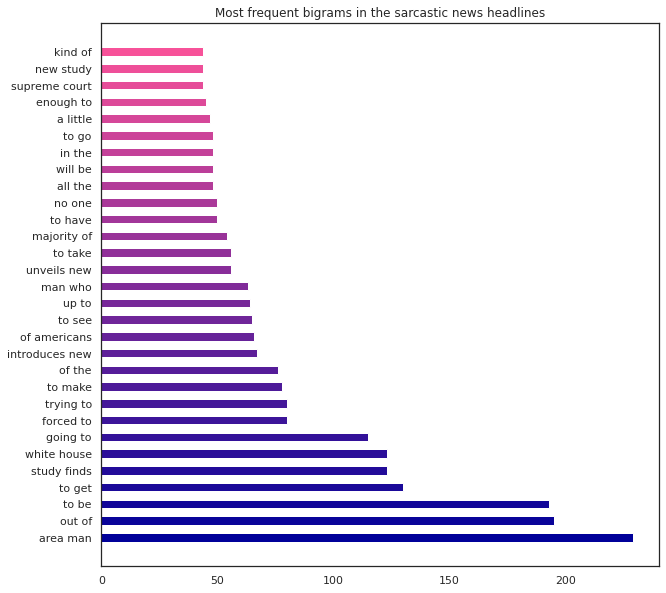

In [ ]:
pairs = []
for item in df.headline[df.is_sarcastic == 1]:
  b = list(nltk.bigrams(item.split()))
  for tple in b:
    pairs.append(' '.join(tple))

pairs = pd.Series(pairs)
all_words = pairs.value_counts()

a = 30
x = all_words.index.values[0:a]
y = all_words.values[0:a]

plt.figure(figsize = (10,10) )
my_colors = [(x/(a), x/(a*3), 0.6) for x in range(a)]

plt.barh(x, y, height = 0.5, color = my_colors)
plt.title('Most frequent bigrams in the sarcastic news headlines')

plt.show()

### Bigrams in non-sarcastic headlines

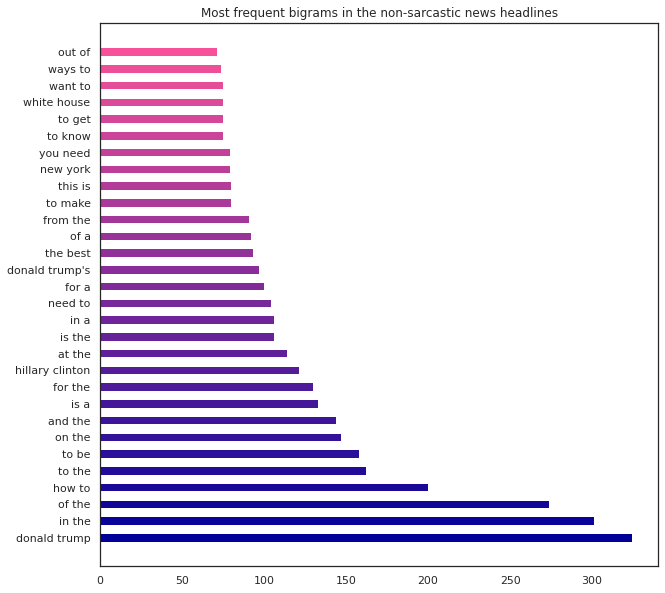

In [ ]:
pairs = []
for item in df.headline[df.is_sarcastic == 0]:
  b = list(nltk.bigrams(item.split()))
  for tple in b:
    pairs.append(' '.join(tple))

pairs = pd.Series(pairs)
all_words = pairs.value_counts()

a = 30
x = all_words.index.values[0:a]
y = all_words.values[0:a]

plt.figure(figsize = (10,10) )
my_colors = [(x/(a), x/(a*3), 0.6) for x in range(a)]

plt.barh(x, y, height = 0.5, color = my_colors)
plt.title('Most frequent bigrams in the non-sarcastic news headlines')

plt.show()

We can see that "donald trump" and "donald trump's" appear in the most frequent bigrams in the non-sarcastic news headlines. A data cleaning process is needed in order to gather these two bigrams in one.

## Trigrams

In [ ]:
triple = []
for item in df.headline:
  t = list(nltk.trigrams(item.split()))
  for tple in t:
    triple.append(' '.join(tple))

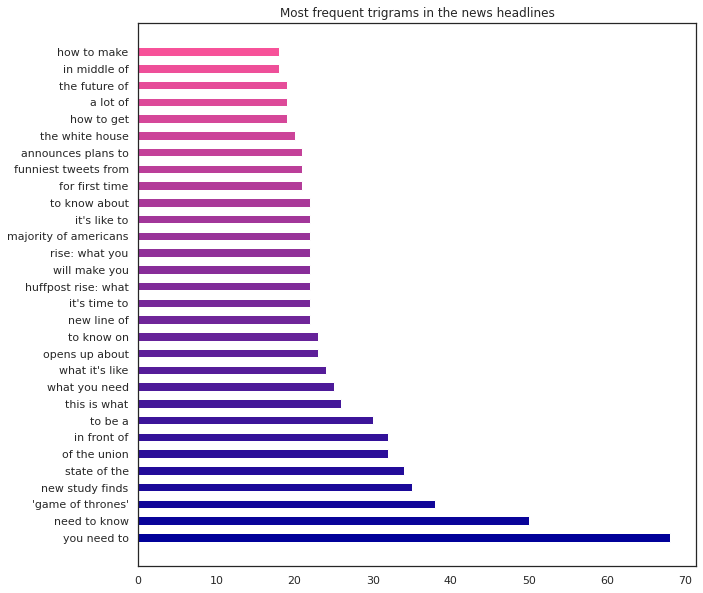

In [ ]:
from itertools import cycle, islice

triple = pd.Series(triple)
all_words = triple.value_counts()

a = 30
x = all_words.index.values[0:a]
y = all_words.values[0:a]

plt.figure(figsize = (10,10) )
my_colors = [(x/(a), x/(a*3), 0.6) for x in range(a)]

plt.barh(x, y, height = 0.5, color = my_colors)
plt.title('Most frequent trigrams in the news headlines')

plt.show()

### Trigrams in sarcastic headlines


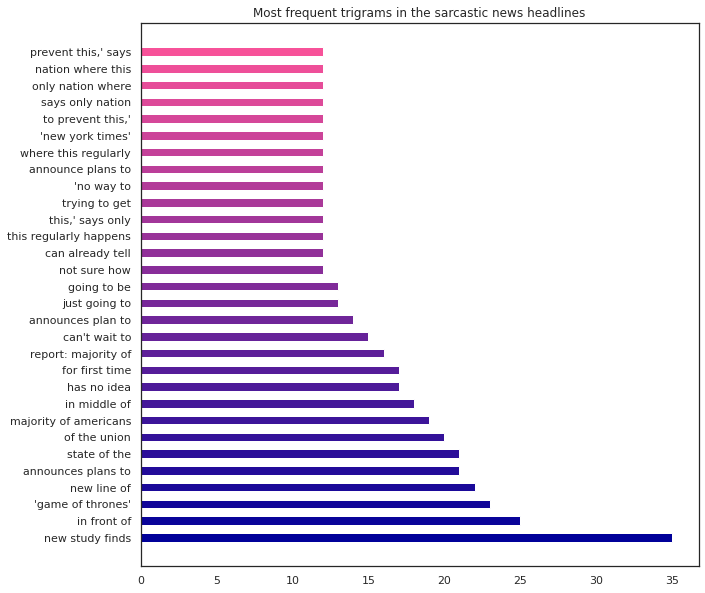

In [ ]:
pairs = []
for item in df.headline[df.is_sarcastic == 1]:
  b = list(nltk.trigrams(item.split()))
  for tple in b:
    pairs.append(' '.join(tple))

pairs = pd.Series(pairs)
all_words = pairs.value_counts()

a = 30
x = all_words.index.values[0:a]
y = all_words.values[0:a]

plt.figure(figsize = (10,10) )
my_colors = [(x/(a), x/(a*3), 0.6) for x in range(a)]

plt.barh(x, y, height = 0.5, color = my_colors)
plt.title('Most frequent trigrams in the sarcastic news headlines')

plt.show()

### Trigrams in non-sarcastic headlines


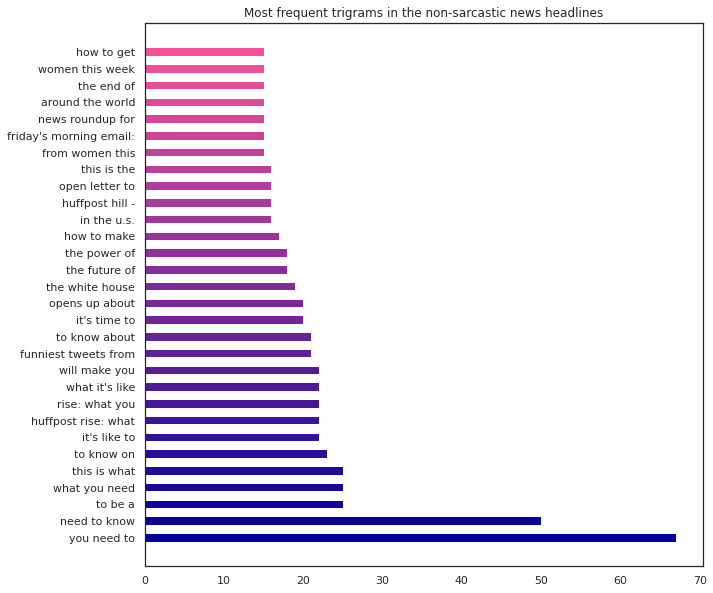

In [ ]:
pairs = []
for item in df.headline[df.is_sarcastic == 0]:
  b = list(nltk.trigrams(item.split()))
  for tple in b:
    pairs.append(' '.join(tple))

pairs = pd.Series(pairs)
all_words = pairs.value_counts()

a = 30
x = all_words.index.values[0:a]
y = all_words.values[0:a]

plt.figure(figsize = (10,10) )
my_colors = [(x/(a), x/(a*3), 0.6) for x in range(a)]

plt.barh(x, y, height = 0.5, color = my_colors)
plt.title('Most frequent trigrams in the non-sarcastic news headlines')

plt.show()

## Headlines wordcloud before data cleaning



In [ ]:
import collections
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### All headlines

Word cloud for 1000 most frequent words in the whole headlines


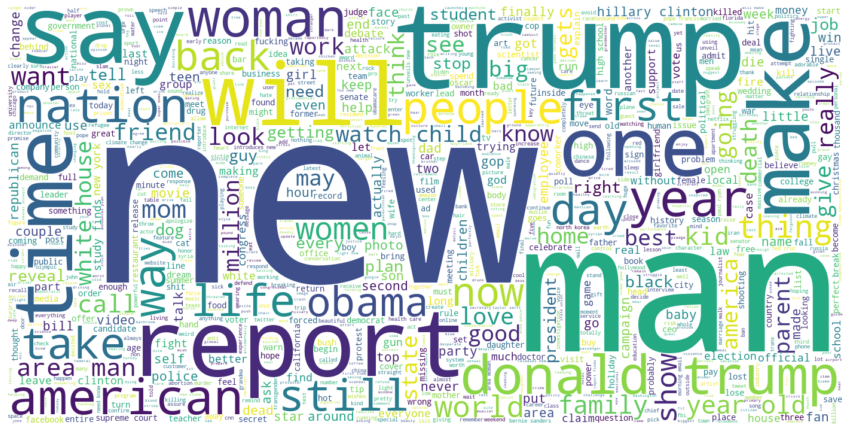

In [ ]:
stop_words = set(STOPWORDS)
headlines_string = " ".join(df['headline'])
wc = WordCloud(background_color = "white", max_words = 1000, width = 1400, height = 700, stopwords = stop_words)
wc.generate(headlines_string)
print('Word cloud for 1000 most frequent words in the whole headlines')
plt.figure(figsize = (15,15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
word_string = ". ".join(df['headline'].str.lower())
wordcount = collections.defaultdict(int)

pattern = r"\W"
for word in word_string.lower().split():
    word = re.sub(pattern, '', word)
    if word not in STOPWORDS:
        wordcount[word] += 1
 
mc = sorted(wordcount.items(), key = lambda k_v: k_v[1], reverse = True)[:7]
for word, count in mc:
    print(word, ":", count)

new : 1677
trump : 1389
man : 1373
will : 609
report : 605
us : 601
one : 554


### Sarcastic headlines

Word cloud for 1000 most frequent words in sarcastic headlines


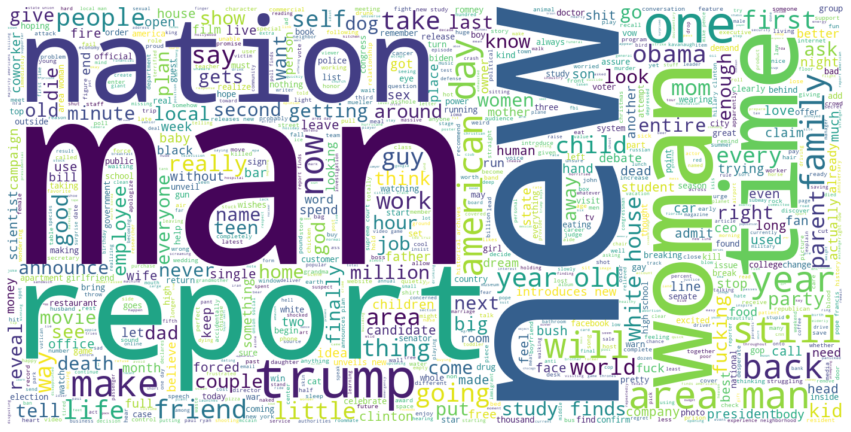

In [ ]:
stop_words = set(STOPWORDS)
headlines_string = " ".join(df[df.is_sarcastic == 1]['headline'])
wc = WordCloud(background_color = "white", max_words = 1000, width = 1400, height = 700, stopwords = stop_words)
wc.generate(headlines_string)
print('Word cloud for 1000 most frequent words in sarcastic headlines')
plt.figure(figsize = (15,15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
word_string = ". ".join(df.headline[df.is_sarcastic == 1].str.lower())
wordcount = collections.defaultdict(int)

pattern = r"\W"
for word in word_string.lower().split():
    word = re.sub(pattern, '', word)
    if word not in STOPWORDS:
        wordcount[word] += 1
        
mc = sorted(wordcount.items(), key = lambda k_v: k_v[1], reverse = True)[:7]
for word, count in mc:
    print(word, ":", count)

man : 1155
new : 1000
report : 516
area : 487
woman : 356
trump : 343
one : 295


### Non-sarcastic headlines

Word cloud for 1000 most frequent words in non-sarcastic headlines


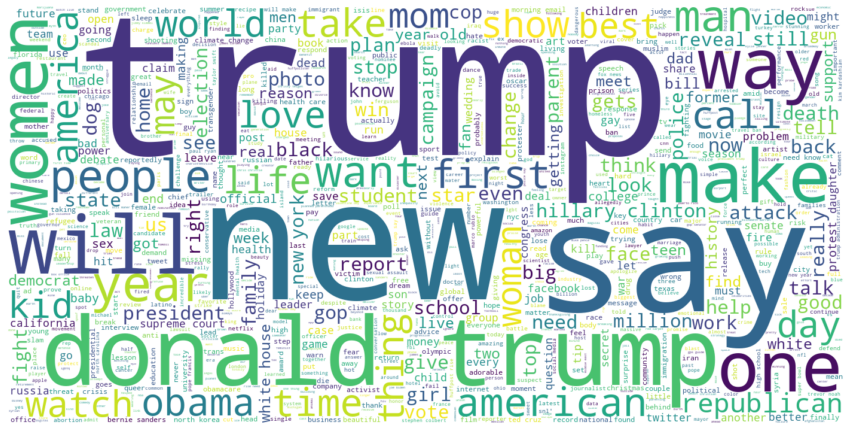

In [ ]:
stop_words = set(STOPWORDS)
headlines_string = " ".join(df[df.is_sarcastic == 0]['headline'])
wc = WordCloud(background_color = "white", max_words = 1000, width = 1400, height = 700, stopwords = stop_words)
wc.generate(headlines_string)
print('Word cloud for 1000 most frequent words in non-sarcastic headlines')
plt.figure(figsize = (15,15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

We can see that 'donald trump' and 'trump' appear in the word cloud. Thus, in the data cleaning process we will merge these two words in one. For example, 'donald trump' will become 'trump'.

In [ ]:
word_string = ". ".join(df.headline[df.is_sarcastic == 0].str.lower())
wordcount = collections.defaultdict(int)

pattern = r"\W"
for word in word_string.lower().split():
    word = re.sub(pattern, '', word)
    if word not in STOPWORDS:
        wordcount[word] += 1
        
mc = sorted(wordcount.items(), key = lambda k_v: k_v[1], reverse = True)[:7]
for word, count in mc:
    print(word, ":", count)

trump : 1046
new : 677
donald : 455
will : 369
trumps : 367
us : 355
says : 349


# Data Cleaning

## Convert to lower case

Even though the headlines seems to be already in lower case, we proceed to this transformation in case.

In [ ]:
df['headline_clean'] = pd.Series(df['headline'].apply(lambda x: x.lower()), index = df.index)
df.head()

is_sarcastic  ...                                     headline_clean
0             1  ...  thirtysomething scientists unveil doomsday clo...
1             0  ...  dem rep. totally nails why congress is falling...
2             0  ...  eat your veggies: 9 deliciously different recipes
3             1  ...  inclement weather prevents liar from getting t...
4             1  ...  mother comes pretty close to using word 'strea...

[5 rows x 4 columns]

## (Convert numerical values to words)

I started to convert numerical values to words but I notice at this end that numerical values are too present in the dataset and that they are both present in sarcastic headlines and non-sarcastic headlines. Thus, numerical values are not relevant in our projet. Then, I decided to not convert numerical values to words but just drop them (see in next section).

In [ ]:
!pip install num2words
import num2words

     |████████████████████████████████| 102kB 6.3MB/s 


In [ ]:
def num_to_words(sentence):
  sentence = ' '.join([num2words.num2words(i) if i.isdigit() else i for i in sentence.split()])
  return sentence

In [ ]:
# df['headline_clean'] = df['headline'].apply(lambda x: num_to_words(x))

## Replace words

Here we replace the most common contracted words in english by their non-contracted form. We also merge some words to one.

In [ ]:
import re

def decontract(phrase):
    # general
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    # phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    # specific
    phrase = re.sub(r"cant", "can not", phrase)
    phrase = re.sub(r"donald trump", "trump", phrase)
    phrase = re.sub(r"barack obama", "obama", phrase)
    return phrase

In [ ]:
df['headline_clean'] = df['headline_clean'].apply(lambda x: decontract(x))
df.head()

is_sarcastic  ...                                     headline_clean
0             1  ...  thirtysomething scientists unveil doomsday clo...
1             0  ...  dem rep. totally nails why congress is falling...
2             0  ...  eat your veggies: 9 deliciously different recipes
3             1  ...  inclement weather prevents liar from getting t...
4             1  ...  mother comes pretty close to using word 'strea...

[5 rows x 4 columns]

## Remove punctuation and numerical values

In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Remove punctuation.

In [ ]:
def remove_punctuation(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    # remove numerical values
    text = re.sub(r'\d+', '', text)
    # substitute multiple whitespace with single whitespace and remove leading and trailing whitespaces 
    text = re.sub('\s+', ' ', text).strip() 
    return text

In [ ]:
df['headline_clean'] = df['headline_clean'].apply(lambda x: remove_punctuation(x))
df.head()

is_sarcastic  ...                                     headline_clean
0             1  ...  thirtysomething scientists unveil doomsday clo...
1             0  ...  dem rep totally nails why congress is falling ...
2             0  ...     eat your veggies deliciously different recipes
3             1  ...  inclement weather prevents liar from getting t...
4             1  ...  mother comes pretty close to using word stream...

[5 rows x 4 columns]

## Filter out stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
def remove_stopwords(x):
  words = x.split(" ")
  temp = []
  for word in words:
    if word not in stop_words:
      temp.append(word)
  return " ".join(temp)

In [ ]:
df['headline_clean'] = df['headline_clean'].apply(lambda x: remove_stopwords(x))
df.head()

is_sarcastic  ...                                     headline_clean
0             1  ...  thirtysomething scientists unveil doomsday clo...
1             0  ...  dem rep totally nails congress falling short g...
2             0  ...          eat veggies deliciously different recipes
3             1  ...       inclement weather prevents liar getting work
4             1  ...  mother comes pretty close using word streaming...

[5 rows x 4 columns]

# Headlines wordcloud after data cleaning



### All headlines

Word cloud for 1000 most frequent words in the whole headlines after data cleaning


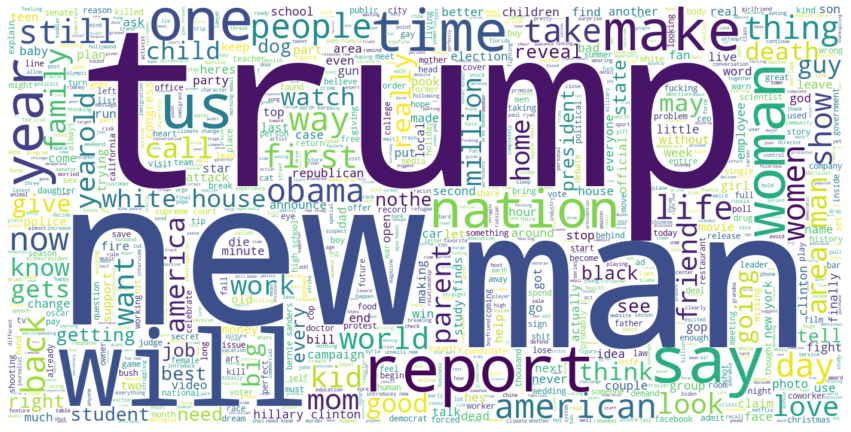

In [ ]:
stop_words = set(STOPWORDS)
headlines_string = " ".join(df['headline_clean'])
wc = WordCloud(background_color = "white", max_words = 1000, width = 1400, height = 700, stopwords = stop_words)
wc.generate(headlines_string)
print('Word cloud for 1000 most frequent words in the whole headlines after data cleaning')
plt.figure(figsize = (15,15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

### Sarcastic headlines

Word cloud for 1000 most frequent words in the sarcastic headlines after data cleaning


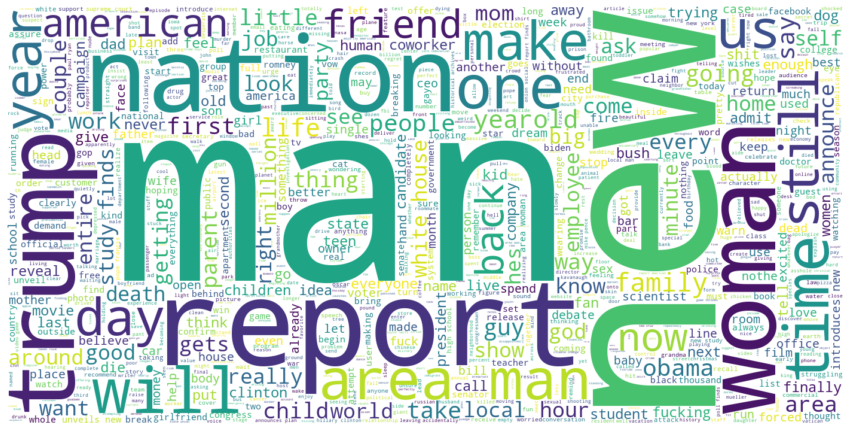

In [ ]:
stop_words = set(STOPWORDS)
headlines_string = " ".join(df[df.is_sarcastic == 1]['headline_clean'])
wc = WordCloud(background_color = "white", max_words = 1000, width = 1400, height = 700, stopwords = stop_words)
wc.generate(headlines_string)
print('Word cloud for 1000 most frequent words in the sarcastic headlines after data cleaning')
plt.figure(figsize = (15,15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

### Non-sarcastic headlines

Word cloud for 1000 most frequent words in the non-sarcastic headlines after data cleaning


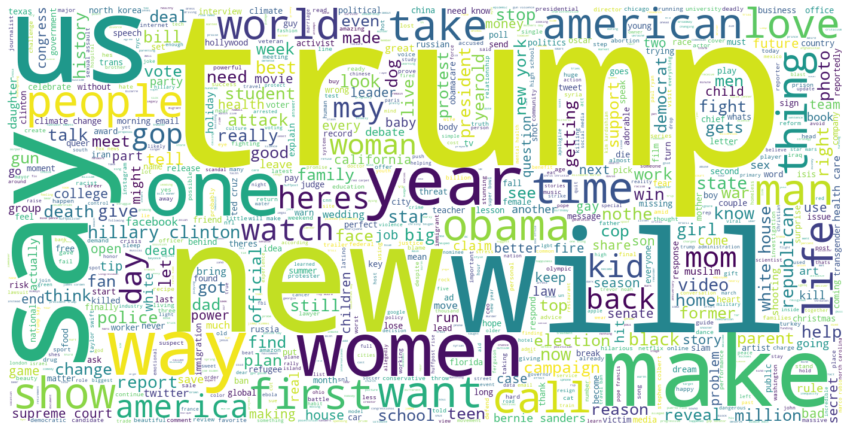

In [ ]:
stop_words = set(STOPWORDS)
headlines_string = " ".join(df[df.is_sarcastic == 0]['headline_clean'])
wc = WordCloud(background_color = "white", max_words = 1000, width = 1400, height = 700, stopwords = stop_words)
wc.generate(headlines_string)
print('Word cloud for 1000 most frequent words in the non-sarcastic headlines after data cleaning')
plt.figure(figsize = (15,15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

After data cleaning, we can see that only 'trump' appears in the word cloud representation.

# Bigrams after data cleaning

## Bigrams in sarcastic headlines

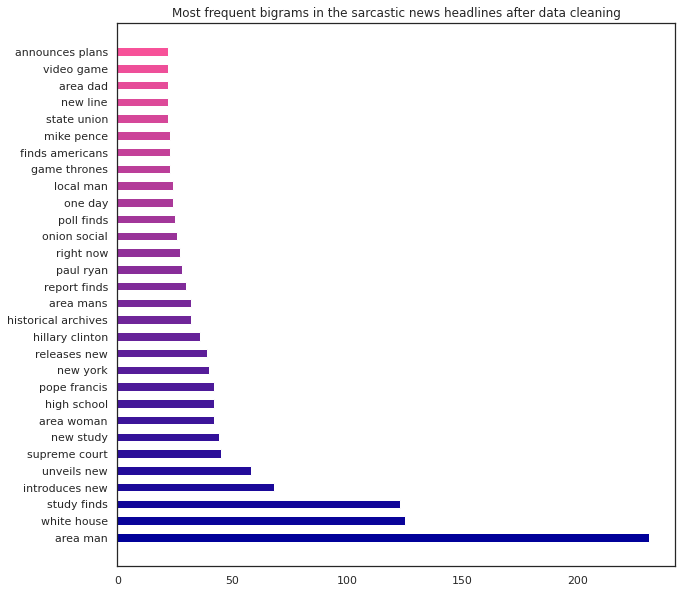

In [ ]:
pairs = []
for item in df.headline_clean[df.is_sarcastic == 1]:
  b = list(nltk.bigrams(item.split()))
  for tple in b:
    pairs.append(' '.join(tple))

pairs = pd.Series(pairs)
all_words = pairs.value_counts()

a = 30
x = all_words.index.values[0:a]
y = all_words.values[0:a]

plt.figure(figsize = (10,10) )
my_colors = [(x/(a), x/(a*3), 0.6) for x in range(a)]

plt.barh(x, y, height = 0.5, color = my_colors)
plt.title('Most frequent bigrams in the sarcastic news headlines after data cleaning')

plt.show()

# Tokenization

In [ ]:
df['headline_token'] = df['headline_clean'].apply(lambda x: nltk.word_tokenize(x))
df.head()

is_sarcastic  ...                                     headline_token
0             1  ...  [thirtysomething, scientists, unveil, doomsday...
1             0  ...  [dem, rep, totally, nails, congress, falling, ...
2             0  ...    [eat, veggies, deliciously, different, recipes]
3             1  ...  [inclement, weather, prevents, liar, getting, ...
4             1  ...  [mother, comes, pretty, close, using, word, st...

[5 rows x 5 columns]

# Parts of speech tagging

Part-of-speech (POS) tagging is a popular Natural Language Processing process which refers to categorizing words in a text (corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context.

The aim is to assign parts of speech to each word of a given headline (such as nouns, verbs, adjectives and so on) based on its definition and its context. Here we apply the POS tagging in the cleaned headlines.

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Lambda to POS tag the whole sentence

def calc_pos(x):
  tokens = x.split(" ")
  try:
    tagged_sent = nltk.pos_tag(tokens)
  except:
    tagged_sent = ["Can not POS"]
  
  return tagged_sent

In [ ]:
df["headline_pos"] = df["headline_clean"].apply(calc_pos)
df.head()

is_sarcastic  ...                                       headline_pos
0             1  ...  [(thirtysomething, VBG), (scientists, NNS), (u...
1             0  ...  [(dem, NN), (rep, NN), (totally, RB), (nails, ...
2             0  ...  [(eat, NN), (veggies, NNS), (deliciously, RB),...
3             1  ...  [(inclement, NN), (weather, NN), (prevents, NN...
4             1  ...  [(mother, NN), (comes, VBZ), (pretty, RB), (cl...

[5 rows x 6 columns]

In [ ]:
sarc_count = {}
non_sarc_count = {}

def pos_dict_sarc(x):
    try:
      pos_dict = dict(x)
    except:
      pos_dict = {}
    for k,v in pos_dict.items():
      if v in sarc_count:
        sarc_count[v] += 1
      else:
        sarc_count[v] = 1

    return pos_dict
   
def pos_dict_no_sarc(x):
    try:
      pos_dict = dict(x)
    except:
      pos_dict = {}
    for k,v in pos_dict.items():
      if v in non_sarc_count:
        non_sarc_count[v] += 1
      else:
        non_sarc_count[v] = 1
    
    return pos_dict
    
    
d1 = df.headline_pos[df.is_sarcastic == 1].apply(pos_dict_sarc)
d2 = df.headline_pos[df.is_sarcastic == 0].apply(pos_dict_no_sarc)

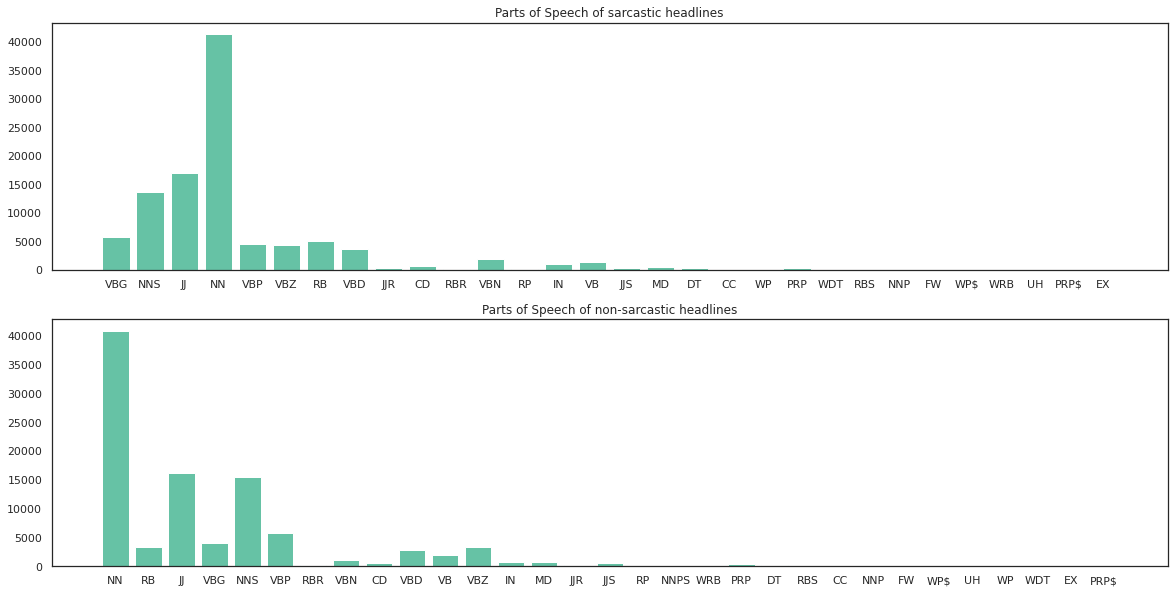

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,10))
plt.subplot(211)
plt.bar(range(len(sarc_count)), list(sarc_count.values()), align = 'center')
plt.xticks(range(len(sarc_count)), list(sarc_count.keys()))
plt.title("Parts of Speech of sarcastic headlines")
plt.subplot(212)
plt.bar(range(len(non_sarc_count)), list(non_sarc_count.values()), align = 'center')
plt.xticks(range(len(non_sarc_count)), list(non_sarc_count.keys()))
plt.title("Parts of Speech of non-sarcastic headlines")
plt.show()

We can notice that nouns are the most present in both sarcastic and non-sarcastic news headlines.

# Lemmatization with POS

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the *lemma*.

Here we precise how to do the lemmatization by precising the POS tagging of a given word in the headline.

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [ ]:
lemmatizer = WordNetLemmatizer()

df['headline_lemmat'] = df['headline_pos'].transform(lambda x: [lemmatizer.lemmatize(a[0], pos = get_wordnet_pos(a[1]))
  if get_wordnet_pos(a[1]) else a[0] for a in x])

df.head()

is_sarcastic  ...                                    headline_lemmat
0             1  ...  [thirtysomething, scientist, unveil, doomsday,...
1             0  ...  [dem, rep, totally, nails, congress, fall, sho...
2             0  ...      [eat, veggie, deliciously, different, recipe]
3             1  ...    [inclement, weather, prevents, liar, get, work]
4             1  ...  [mother, come, pretty, close, use, word, strea...

[5 rows x 7 columns]

# Bag of words

In this part, we create our own dictionary for this dataset.

In [ ]:
import matplotlib.pyplot as plt

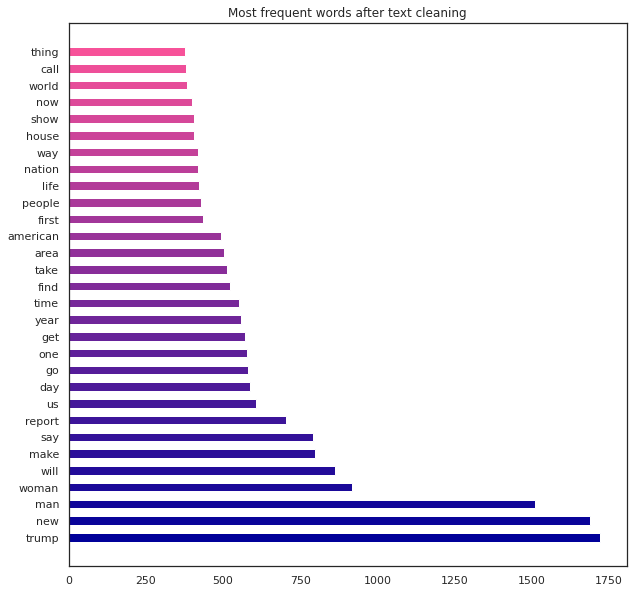

In [ ]:
dictionary = pd.Series(sum([item for item in df.headline_lemmat], [])).value_counts()

a = 30
x = dictionary.index.values[0:a]
y = dictionary.values[0:a]

plt.figure(figsize = (10,10))
my_colors = [(x/(a), x/(a*3), 0.6) for x in range(a)]

plt.barh(x, y, height = 0.5, color = my_colors)
plt.title('Most frequent words after text cleaning')

plt.show()

In [ ]:
print(dictionary.index)

Index(['trump', 'new', 'man', 'woman', 'will', 'make', 'say', 'report', 'us',
       'day',
       ...
       'owls', 'pssy', 'pizzadelivery', 'exciting', 'buttercovered',
       'anthropomorphic', 'portia', 'burma', 'inferiority', 'scorecard'],
      dtype='object', length=23779)


In [ ]:
len(dictionary)

23779

The size of the dictionary is quite large and in order to reduce the computational cost we reduce its size. We select words in the dictionary which appear at least more thant three times in the all news headlines.

In [ ]:
type(dictionary)
dictionary_small = dictionary[dictionary.values > 3]
len(dictionary_small)

7027

In [ ]:
import numpy as np

def bag_of_words(headline):
  bow = np.zeros(len(dictionary_small), dtype = int)
  for i, word in enumerate(dictionary_small.index):
    for item in headline:
      if item == word:
        bow[i] = bow[i] + 1
  return(list(bow))

In [ ]:
df['bow'] = df['headline_lemmat'].apply(lambda x: bag_of_words(x))
df.head()

is_sarcastic  ...                                                bow
0             1  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1             0  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2             0  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3             1  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
4             1  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

[5 rows x 8 columns]

In [ ]:
# Save the cleaned dataset
# df.to_json('/content/gdrive/MyDrive/LSMA/Project/Sarcasm_Headlines_Dataset_v2_final.json')

# Model development with BoW feature vector

Here, we evaluate several classification algorithms with a BoW feature vector.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_json('/content/gdrive/MyDrive/LSMA/Project/Sarcasm_Headlines_Dataset_v2_final.json')
df.head()

is_sarcastic  ...                                                bow
0             1  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1             0  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2             0  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3             1  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
4             1  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

[5 rows x 8 columns]

In [ ]:
X = np.asarray(list(df['bow'].values))
Y = np.asarray(list(df['is_sarcastic'].values))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
p_pred = model.predict_proba(X_test)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
score = model.score(X_test, y_test)
cmat = metrics.confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

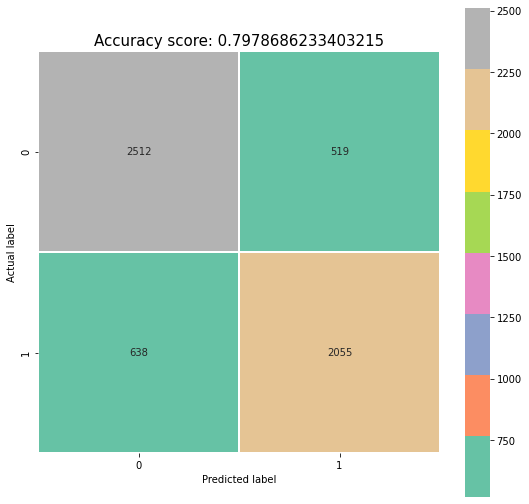

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cmat, annot = True, linewidths = 0.5, square = True, cmap = 'Set2', fmt = 'g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

### Gaussian classifier

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
p_pred = model.predict_proba(X_test)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
score = model.score(X_test, y_test)
cmat = metrics.confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

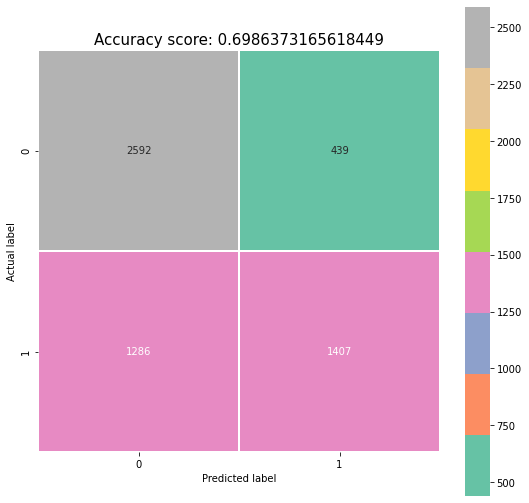

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cmat, annot = True, linewidths = 0.5, square = True, cmap = 'Set2', fmt = 'g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Bernoulli classifier

In [ ]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
p_pred = model.predict_proba(X_test)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
score = model.score(X_test, y_test)
cmat = metrics.confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

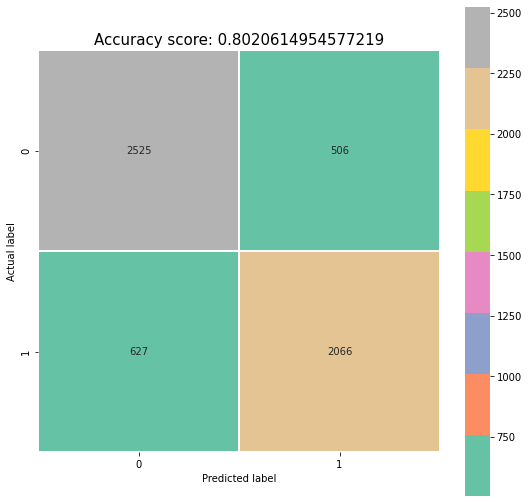

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cmat, annot = True, linewidths = 0.5, square = True, cmap = 'Set2', fmt = 'g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 0)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
p_pred = model.predict_proba(X_test)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
score = model.score(X_test, y_test)
cmat = metrics.confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

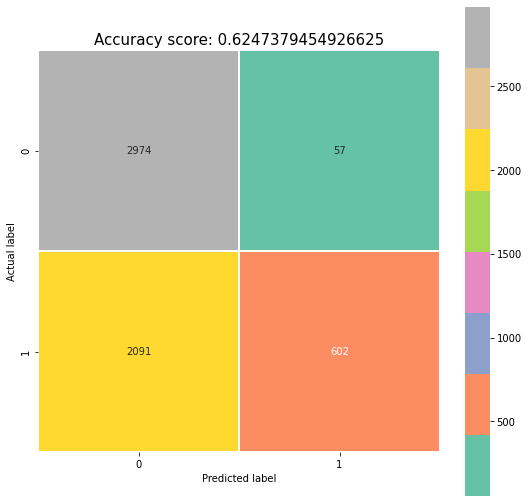

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cmat, annot = True, linewidths = 0.5, square = True, cmap = 'Set2', fmt = 'g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Linear SVM 

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC(dual = False)
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
score = model.score(X_test, y_test)
cmat = metrics.confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

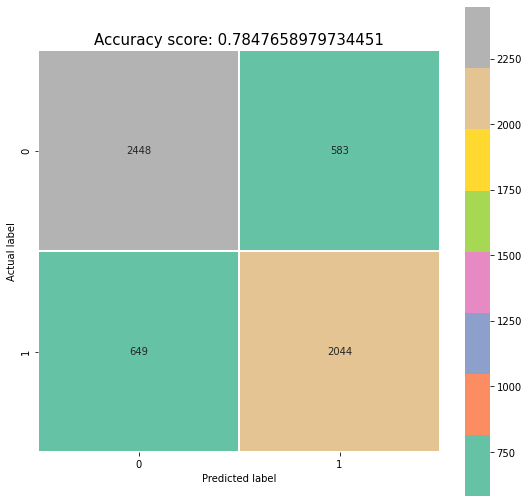

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cmat, annot = True, linewidths = 0.5, square = True, cmap = 'Set2', fmt = 'g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Decision Tree

Decision tree is not an appropriate model with BoW feature vector because we only have two values: 0 and 1. It explains the reason why we have an accuracy of almost 50%.

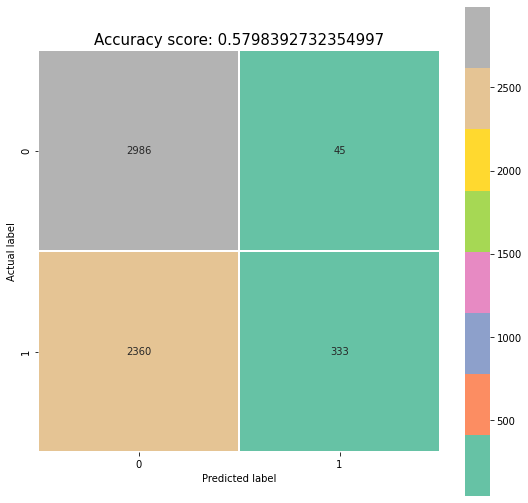

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(max_depth=3).fit(X, Y)
model = model.fit(X_train, y_train)

p_pred = model.predict_proba(X_test)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
score = model.score(X_test, y_test)
cmat = metrics.confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cmat, annot = True, linewidths = 0.5, square = True, cmap = 'Set2', fmt = 'g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

[Text(167.4, 190.26, 'X[2] <= 0.5\ngini = 0.499\nsamples = 22894\nvalue = [11954, 10940]'),
 Text(83.7, 135.9, 'X[0] <= 0.5\ngini = 0.496\nsamples = 21709\nvalue = [11763, 9946]'),
 Text(41.85, 81.53999999999999, 'X[22] <= 0.5\ngini = 0.499\nsamples = 20372\nvalue = [10716, 9656]'),
 Text(20.925, 27.180000000000007, 'gini = 0.498\nsamples = 20047\nvalue = [10694, 9353]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.126\nsamples = 325\nvalue = [22, 303]'),
 Text(125.55000000000001, 81.53999999999999, 'X[22] <= 0.5\ngini = 0.34\nsamples = 1337\nvalue = [1047, 290]'),
 Text(104.625, 27.180000000000007, 'gini = 0.331\nsamples = 1321\nvalue = [1044, 277]'),
 Text(146.475, 27.180000000000007, 'gini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(251.10000000000002, 135.9, 'X[73] <= 0.5\ngini = 0.27\nsamples = 1185\nvalue = [191, 994]'),
 Text(209.25, 81.53999999999999, 'X[447] <= 0.5\ngini = 0.248\nsamples = 1156\nvalue = [168, 988]'),
 Text(188.32500000000002, 27.180000000000007

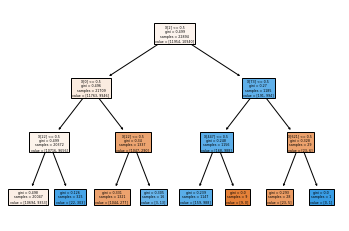

In [ ]:
plot_tree(model, filled = True)

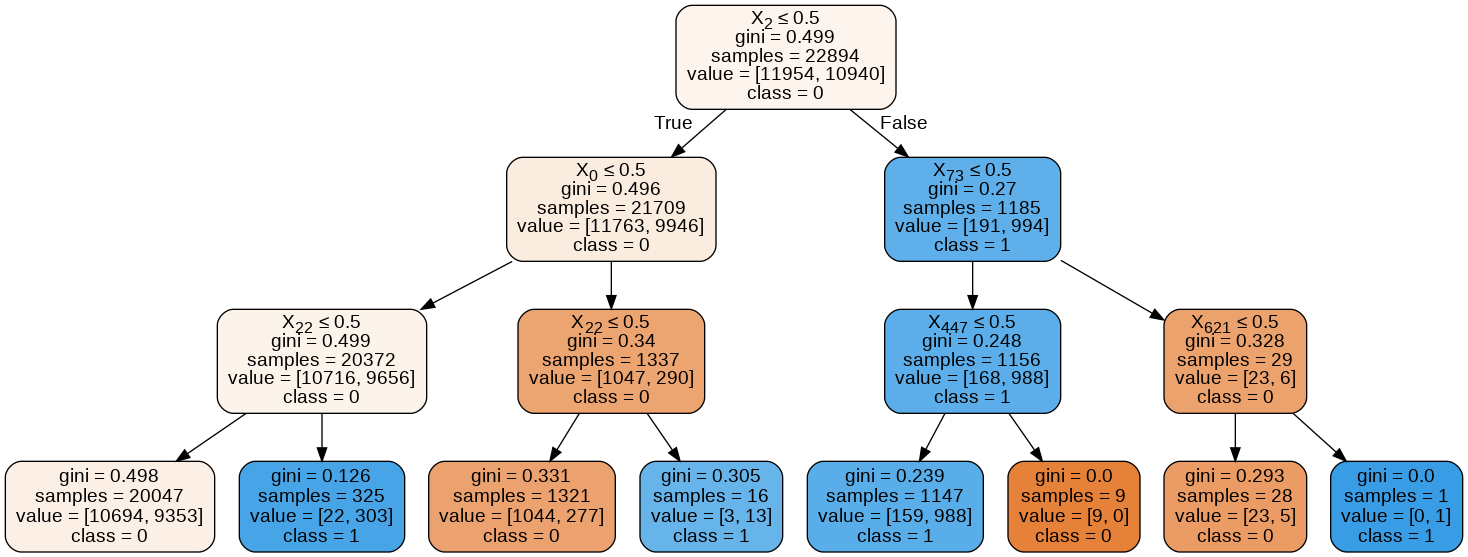

In [ ]:
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# TF-IDF

Tf-Idf stands for Term Frequency and Inverse Document Frequency and is intended to reflect how relevant a term is in a given document.

We use the Tf-Idf vectorizer with a limit of 10000 words, capturing unigrams (i.e. "new" and "york") and bigrams (i.e. "new york").

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 10000, ngram_range = (1,2))

In [ ]:
corpus = df['headline_clean']

vectorizer.fit(corpus)
X = vectorizer.transform(corpus)
Y = np.asarray(list(df['is_sarcastic'].values))
dic_vocabulary = vectorizer.vocabulary_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

The feature matrix X has 28618 news headlines and 10000 vocabularies.

In [ ]:
X.shape

(28618, 10000)

We can check in the vocabulary the position of a certain word.

In [ ]:
word = "new york"
dic_vocabulary[word]

5904

# Model development with Tf-Idf feature vector

## Logistic regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
p_pred = model.predict_proba(X_test)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
score = model.score(X_test, y_test)
cmat = metrics.confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

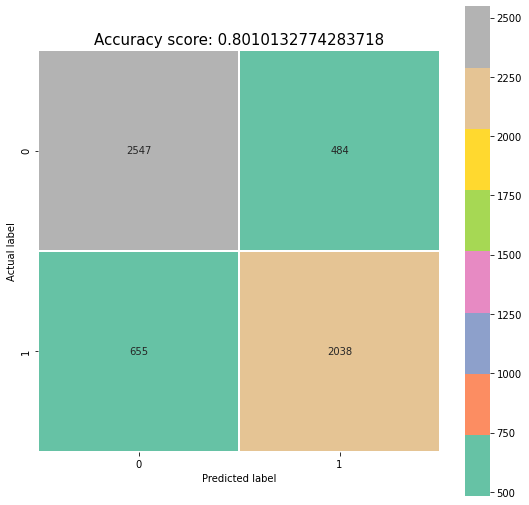

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cmat, annot = True, linewidths = 0.5, square = True, cmap = 'Set2', fmt = 'g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Naive Bayes

### Gaussian classifier

In [ ]:
model = GaussianNB()
model.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
p_pred = model.predict_proba(X_test.toarray())
y_pred = model.predict(X_test.toarray())
accuracy = metrics.accuracy_score(y_test, y_pred)
score = model.score(X_test.toarray(), y_test)
cmat = metrics.confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

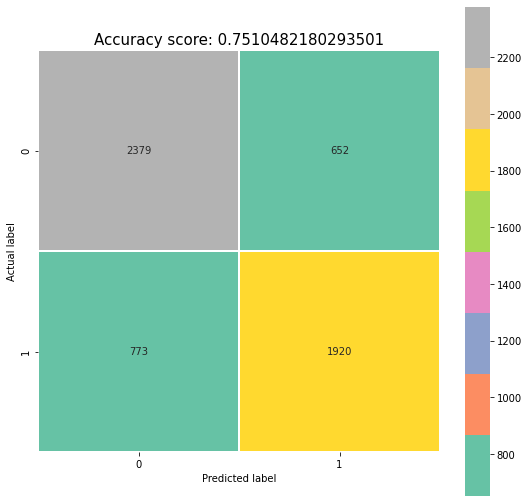

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cmat, annot = True, linewidths = 0.5, square = True, cmap = 'Set2', fmt = 'g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Bernoulli Classifier

In [ ]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
p_pred = model.predict_proba(X_test)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
score = model.score(X_test, y_test)
cmat = metrics.confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

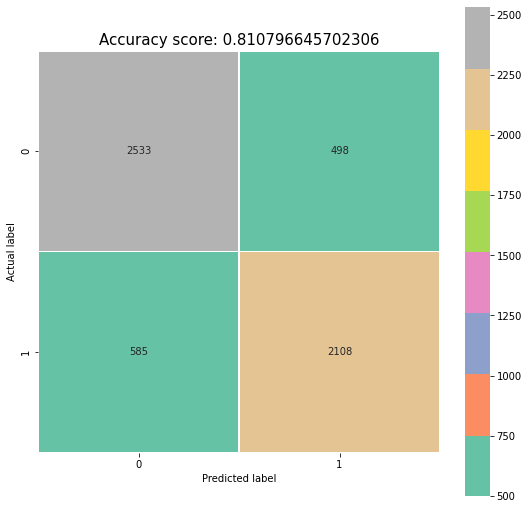

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cmat, annot = True, linewidths = 0.5, square = True, cmap = 'Set2', fmt = 'g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 0)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
p_pred = model.predict_proba(X_test)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
score = model.score(X_test, y_test)
cmat = metrics.confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

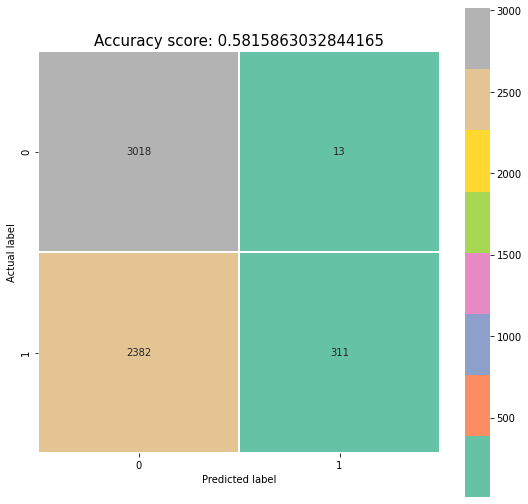

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cmat, annot = True, linewidths = 0.5, square = True, cmap = 'Set2', fmt = 'g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Linear SVM 

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC(dual = False)
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
score = model.score(X_test, y_test)
cmat = metrics.confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

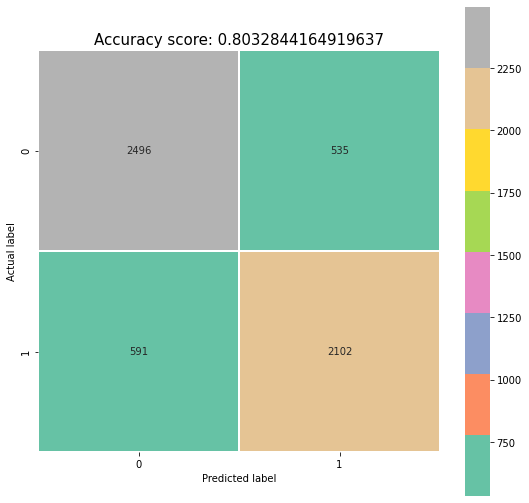

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cmat, annot = True, linewidths = 0.5, square = True, cmap = 'Set2', fmt = 'g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Decision Tree

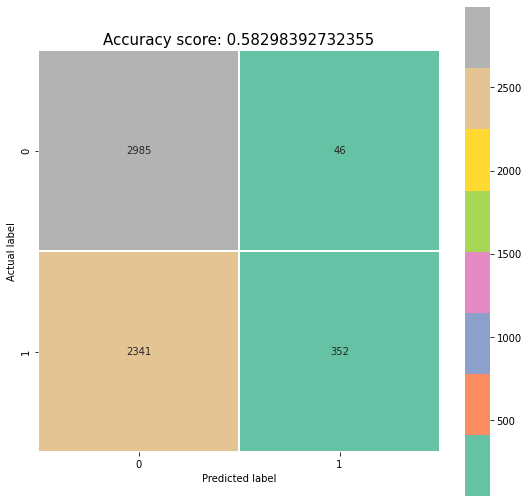

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(max_depth=3).fit(X, Y)
model = model.fit(X_train, y_train)

p_pred = model.predict_proba(X_test)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
score = model.score(X_test, y_test)
cmat = metrics.confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cmat, annot = True, linewidths = 0.5, square = True, cmap = 'Set2', fmt = 'g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

[Text(167.4, 190.26, 'X[5217] <= 0.06\ngini = 0.499\nsamples = 22894\nvalue = [11954, 10940]'),
 Text(83.7, 135.9, 'X[7295] <= 0.079\ngini = 0.497\nsamples = 21816\nvalue = [11775, 10041]'),
 Text(41.85, 81.53999999999999, 'X[9156] <= 0.179\ngini = 0.495\nsamples = 21336\nvalue = [11699, 9637]'),
 Text(20.925, 27.180000000000007, 'gini = 0.497\nsamples = 20587\nvalue = [11067, 9520]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.264\nsamples = 749\nvalue = [632, 117]'),
 Text(125.55000000000001, 81.53999999999999, 'X[6058] <= 0.115\ngini = 0.267\nsamples = 480\nvalue = [76, 404]'),
 Text(104.625, 27.180000000000007, 'gini = 0.259\nsamples = 477\nvalue = [73, 404]'),
 Text(146.475, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(251.10000000000002, 135.9, 'X[6642] <= 0.107\ngini = 0.277\nsamples = 1078\nvalue = [179, 899]'),
 Text(209.25, 81.53999999999999, 'X[55] <= 0.136\ngini = 0.253\nsamples = 1049\nvalue = [156, 893]'),
 Text(188.32500000000002, 27

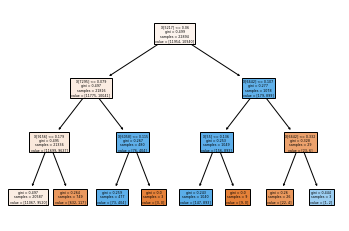

In [ ]:
plot_tree(model, filled = True)

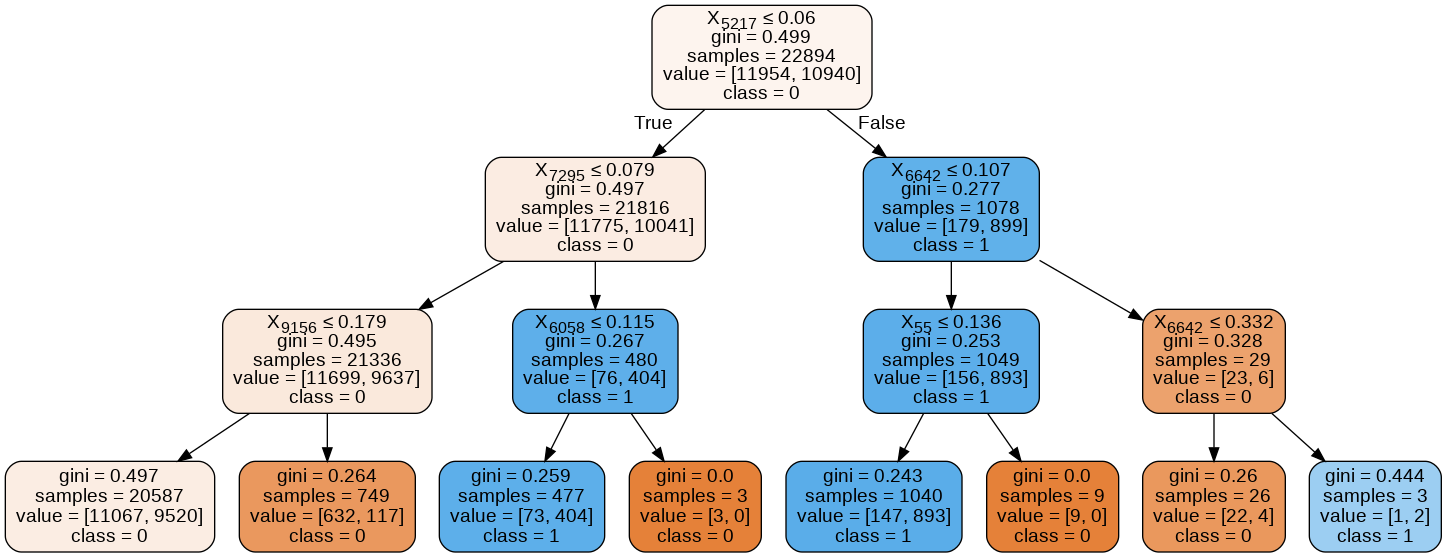

In [ ]:
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Word Embedding

Word Embedding is the collective name for feature learning techniques where words from the vocabulary are mapped to vectors of real numbers. These vectors are calculated from the probability distribution for each word appearing before or after another. To put it another way, words of the same context usually appear together in the corpus, so they will be close in the vector space as well.

## Word2Vec




Word2Vec produces a vector space, typically of several hundred dimensions, with each unique word in the corpus such that words that share common contexts in the corpus are located close to one another in the space. That can be done using 2 different approaches: starting from a single word to predict its context (Skip-gram) or starting from the context to predict a word (Continuous Bag-of-Words).

In [ ]:
!pip install gensim

In [ ]:
import gensim
from gensim.models import Word2Vec
import gensim.downloader as gensim_api
import matplotlib.pyplot as plt
from sklearn import manifold

In Python, we can load a pre-trained Word Embedding model from genism-data: 
https://code.google.com/archive/p/word2vec/

We are going to use a pre-trained vectors trained on part of Google News dataset (about 100 billion words). The model contains 300-dimensional vectors for 3 million words and phrases, available at their official page: 
https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

In [ ]:
# model_gn = gensim.models.KeyedVectors.load_word2vec_format('/content/gdrive/MyDrive/LSMA/Project/GoogleNews-vectors-negative300.bin', binary = True)

But, we can also fit our own Word2Vec on the training data headlines with gensim instead using a pre-trained model.

In [ ]:
corpus = df["headline_clean"]

In [ ]:
# Create list of lists of unigrams
lst_corpus = []
for string in corpus:
   lst_words = string.split()
   lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)

# Detect bigrams and trigrams
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, 
                 delimiter=" ".encode(), min_count = 5, threshold = 10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], 
            delimiter = " ".encode(), min_count = 5, threshold = 10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

In [ ]:
# Fit our Word2Vec
my_model_gn = gensim.models.word2vec.Word2Vec(lst_corpus, size = 300,   
            window = 8, min_count = 1, sg = 1, iter = 30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


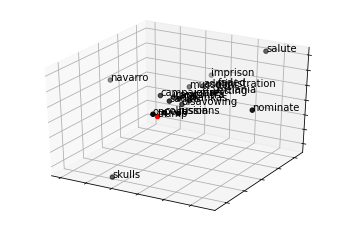

In [ ]:
word = "trump"
fig = plt.figure()

# Word Embedding
tot_words = [word] + [tupla[0] for tupla in 
                 my_model_gn.most_similar(word, topn = 20)]
X = my_model_gn[tot_words]

# PCA to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity = 40, n_components = 3, init = 'pca')
X = pca.fit_transform(X)

# Create dataframe
dtf = pd.DataFrame(X, index = tot_words, columns = ['x','y','z'])
dtf['input'] = 0
dtf['input'].iloc[0:1] = 1

# Plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(dtf[dtf['input']==0]['x'], 
           dtf[dtf['input']==0]['y'], 
           dtf[dtf['input']==0]['z'], c = 'black')
ax.scatter(dtf[dtf['input']==1]['x'], 
           dtf[dtf['input']==1]['y'], 
           dtf[dtf['input']==1]['z'], c = 'red')
ax.set(xlabel = None, ylabel = None, zlabel = None, xticklabels = [], yticklabels = [], zticklabels = [])
for label, row in dtf[['x','y','z']].iterrows():
    x, y, z = row
    ax.text(x, y, z, s = label)